[[0. 7. 2. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [7. 0. 3. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 3. 0. 0. 4. 0. 0. 0. 1. 0. 0. 0. 0.]
 [3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
 [0. 4. 4. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 5. 0. 0. 0. 3. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 3. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 4. 4.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0. 4. 4.]
 [0. 0. 0. 0. 0. 5. 0. 0. 0. 4. 4. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0. 0. 4. 4. 0. 0.]]


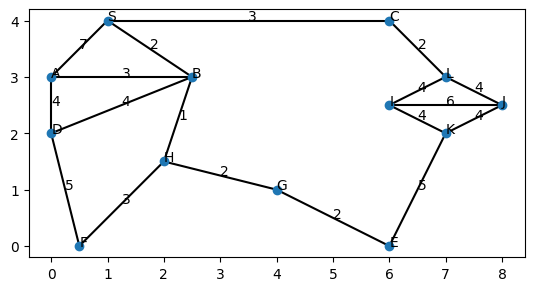

In [1]:
# Dijkstra
import numpy as np
import matplotlib.pyplot as plt

keys = "SABCDEFGHIJKL"
m = {key:i for i, key in enumerate(keys)}

test = np.array([
    [1,4], # S
    [0,3], # A
    [2.5,3], # B
    [6,4], # C
    [0,2], # D
    [6,0], # E
    [0.5,0], # F
    [4,1], # G
    [2,1.5], # H
    [6,2.5], # I
    [8,2.5], # J
    [7, 2], # K
    [7,3], # L
])

adj_mat = np.zeros([len(test), len(test)])
def add_adj(val):
    adj_mat[m[val[0]], m[val[1]]] = int(val[2])
    adj_mat[m[val[1]], m[val[0]]] = int(val[2])
add_adj("SA7")
add_adj("SB2")
add_adj("SC3")
add_adj("AD4")
add_adj("BA3")
add_adj("BD4")
add_adj("BH1")
add_adj("CL2")
add_adj("DF5")
add_adj("EG2")
add_adj("EK5")
add_adj("FH3")
add_adj("GH2")
add_adj("IL4")
add_adj("IK4")
add_adj("IJ6")
add_adj("JK4")
add_adj("JL4")
print(adj_mat)

def plot(data, adj):
    plt.figure()
    plt.scatter(data[:,0], data[:,1], zorder=3)
    for i in range(len(data)):
        plt.text(*(data[i]), keys[i], zorder=3)
        for j in range(i+1, len(data)):
            if adj[i,j]:
                plt.plot([data[i,0], data[j,0]], [data[i,1], data[j,1]], "k")
                plt.text(*((data[i]+data[j])/2), str(int(adj[i,j])), zorder=3)

    plt.axis("scaled")
    plt.show()

plot(test, adj_mat)

In [2]:
def dijkstra(adj, start=0, ziel=5):
    besucht = []
    vor = []
    nodelist = list(range(len(adj)))
    nachbarn = [[i, float("inf"), -1] for i in nodelist]
    nachbarn[start][1] = 0
    nachbarn[start][2] = 0

    while nodelist[ziel] not in besucht:
        nachbarn = sorted(nachbarn, key=lambda x: x[1])
        node = nachbarn[0]
        for j, (i, val, _) in enumerate(nachbarn):
            if nv:=adj[node[0], i]:
                new_val = node[1]+nv
                if new_val<nachbarn[j][1]:
                    print(f"Update Schritt {len(besucht)}: [{keys[nachbarn[j][0]]},{nachbarn[j][1]}]->[{keys[nachbarn[j][0]]},{int(new_val)}]")
                    nachbarn[j][1] = new_val
                    nachbarn[j][-1] = node[0]
        nachbarn.pop(0)
        besucht.append(node[0])
        vor.append(node[-1])

    print(*list(zip([keys[i] for i in besucht], [keys[i] for i in vor])), sep="\n")
    weg = [vor[-1]]
    while weg[-1]:
        weg.append(vor[weg[-1]])

    print("Weg:", [keys[i] for i in weg[::-1]])



dijkstra(adj_mat)

Update Schritt 0: [A,inf]->[A,7]
Update Schritt 0: [B,inf]->[B,2]
Update Schritt 0: [C,inf]->[C,3]
Update Schritt 1: [A,7.0]->[A,5]
Update Schritt 1: [D,inf]->[D,6]
Update Schritt 1: [H,inf]->[H,3]
Update Schritt 2: [L,inf]->[L,5]
Update Schritt 3: [F,inf]->[F,6]
Update Schritt 3: [G,inf]->[G,5]
Update Schritt 5: [I,inf]->[I,9]
Update Schritt 5: [J,inf]->[J,9]
Update Schritt 6: [E,inf]->[E,7]
Update Schritt 9: [K,inf]->[K,12]
('S', 'S')
('B', 'S')
('C', 'S')
('H', 'B')
('A', 'B')
('L', 'C')
('G', 'H')
('D', 'B')
('F', 'H')
('E', 'G')
Weg: ['S', 'B', 'G']


Knoten **L** hat Position **[7. 3.]**. Verbindungen:


| Knoten | Kosten |
|---|---|
|C|2.0|
|I|4.0|
|J|4.0|


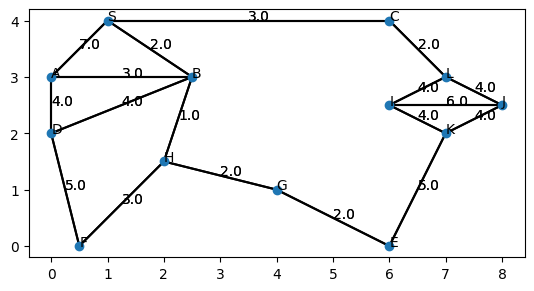

In [3]:
import matplotlib.pyplot as plt
import random
from IPython.display import display, Markdown, Latex

class Knoten():
    def __init__(self, name, pos):
        self.name = name
        self.pos = pos
        self.nachbarn = []
        self.vorg = None
        self.kosten = float("inf")

    def copy(self):
        out = Knoten(self.name, self.pos)

        out.nachbarn = self.nachbarn.copy()
        out.vorg = self.vorg
        out.kosten = self.kosten
        return out

    def set_nachbarn(self, nachbar):
        if isinstance(nachbar, list):
            self.nachbarn.extend(nachbar)
        else:
            self.nachbarn.append(nachbar)

    def __repr__(self):
        return f"Knoten {self.name} hat Position {self.pos} und Verbindungen {self.nachbarn}."

    def display(self):
        text = f"Knoten **{self.name}** hat Position **{self.pos}**. Verbindungen:\n"
        table = "| Knoten | Kosten |\n|---|---|\n"
        for eintrag in self.nachbarn:
            table += f"|{eintrag[0]}|{eintrag[1]}|\n"
        display(Markdown(text))
        display(Markdown(table))

class Knotenliste():
    def __init__(self):
        self.liste = []

    def append(self, item):
        self.liste.append(item)

    def __getitem__(self, idx):
        return self.liste[idx]

    def get_knoten(self, name):
        for idx in range(len(self.liste)):
            if self.liste[idx].name == name:
                return self.liste[idx]

    def display_knoten(self):
        aktuell = self.liste[0]

        while True:
            aktuell.display()
            naechster = input("Gib einen Knotennamen ein. ")
            for eintrag in self.liste:
                if naechster.upper()==eintrag.name:
                    aktuell = self.get_knoten(naechster)
                    break
            else:
                print(f"{naechster} ist leider nicht enthalten.")

    def verbinde(self, verb):
        k1 = verb[0]
        k2 = verb[1]
        val = float(verb[2])
        self._verbinde(k1, k2, val)

    def _verbinde(self, k1, k2, val):
        for k in self.liste:
            if k.name==k1:
                k.set_nachbarn((k2, val))
            elif k.name==k2:
                k.set_nachbarn((k1,val))

    def draw(self):
        plt.figure()
        for k in self.liste:
            plt.scatter(k.pos[0], k.pos[1], zorder=3, c="tab:blue")
            plt.text(k.pos[0], k.pos[1], k.name, zorder=4)

        for k1 in self.liste:
            for k2name, v in k1.nachbarn:
                plt.plot([k1.pos[0], self.get_knoten(k2name).pos[0]], [k1.pos[1], self.get_knoten(k2name).pos[1]], "k")
                plt.text((k1.pos[0]+self.get_knoten(k2name).pos[0])/2, (k1.pos[1]+self.get_knoten(k2name).pos[1])/2, str(v), zorder=3)

        plt.axis("scaled")
        plt.show()

knotenliste = Knotenliste()
for i in range(len(test)):
    knotenliste.append(Knoten(keys[i], test[i]))

adj = ["SA7", "SB2", "SC3", "AD4", "BA3", "BD4", "BH1", "CL2", "DF5", "EG2", "EK5", "FH3", "GH2", "IL4", "IK4", "IJ6", "JK4", "JL4"]

for a in adj:
    knotenliste.verbinde(a)
knotenliste[-1].display()

knotenliste.draw()

In [4]:
class Pfad(Knotenliste):
    def __init__(self):
        super().__init__()
        self.kostenliste = []
        self.pfad = []

    def _verbinde(self, k1, k2, kosten):
        ziel = self.get_knoten(k2)
        ziel.nachbarn = [(k1, kosten)]

    def menschenwalk(self, graph, start="S", end="E"):
        display(Markdown(f"### Wir suchen den Pfad von Knoten {start} zu Knoten {end}."))

        aktuell = graph.get_knoten(start)

        while aktuell.name!=end:
            display(Markdown(f"Wir sind aktuell bei Knoten **{aktuell.name}**. Momentan sind unsere Kosten **{self.kosten}**. Er ist verbunden mit den folgenden Knoten:"))
            aktuell.display()

            weiter = True
            while weiter:
                weiter = False
                naechster = input("Wo wollen wir hingehen? ")
                for eintrag in aktuell.nachbarn:
                    if naechster.upper()==eintrag[0]:
                        self.kostenliste.append(eintrag[1])
                        break
                else:
                    print(f"{naechster} ist leider nicht enthalten.")
                    weiter = True
            aktuell = graph.get_knoten(naechster)
        display(Markdown(f"Sehr gut, wir sind am Zielknoten {end} angekommen! Unser Pfad hat Kosten von {self.kosten}."))

    def randomwalk(self, graph, start="S", end="E"):
        knoten = graph.get_knoten(start)
        self.pfad.append(knoten.name)
        while knoten.name!=end:
            nachbarliste = knoten.nachbarn
            naechster = random.choice(nachbarliste)
            knoten = graph.get_knoten(naechster[0])
            self.pfad.append(knoten.name)
            self.kostenliste.append(naechster[1])

    def prune(self):
        for i in range(len(self.pfad), 0, -1):
            if self.pfad[i-1] in self.pfad[:i-1]:
                neueliste = self.pfad[:self.pfad.index(self.pfad[i-1])]+self.pfad[i-1:]
                neuekosten = self.kostenliste[:self.pfad.index(self.pfad[i-1])]+self.kostenliste[i-1:]
                self.pfad = neueliste
                self.kostenliste = neuekosten
                break
        else:
            return
        self.prune()

    def dijkstra(self, graph, start="S", end="E"):
        self.pfad = dijkstra(graph, "S", "E")

    def __repr__(self):
        return f"Der Pfad {self.pfad} hatte die Kosten {sum(self.kostenliste)}."

def dijkstra(graph, start="S", ziel="E"):
    graph.get_knoten(start).kosten = 0
    knotenliste = [k.name for k in graph.liste]

    besucht = [knotenliste.pop(0)]
    while ziel not in besucht:
        knoten = besucht[-1]
        print(knoten)
        return

    # Backtracking
    weg = []
    return weg

    nodelist = list(range(len(adj)))
    nachbarn = [[i, float("inf"), -1] for i in nodelist]
    nachbarn[start][1] = 0
    nachbarn[start][2] = 0

    while nodelist[ziel] not in besucht:
        nachbarn = sorted(nachbarn, key=lambda x: x[1])
        node = nachbarn[0]
        for j, (i, val, _) in enumerate(nachbarn):
            if nv:=adj[node[0], i]:
                new_val = node[1]+nv
                if new_val<nachbarn[j][1]:
                    print(f"Update Schritt {len(besucht)}: [{keys[nachbarn[j][0]]},{nachbarn[j][1]}]->[{keys[nachbarn[j][0]]},{int(new_val)}]")
                    nachbarn[j][1] = new_val
                    nachbarn[j][-1] = node[0]
        nachbarn.pop(0)
        besucht.append(node[0])
        vor.append(node[-1])

    return weg


random.seed()
pfad = Pfad()
#pfad.menschenwalk(knotenliste)
#pfad.randomwalk(knotenliste)
pfad.dijkstra(knotenliste)
print(pfad)
#knotenliste.display_knoten()
#print(pfad)
#print(dijkstra(knotenliste))

S
Der Pfad None hatte die Kosten 0.
